In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Data pre-processing***

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read csv file

df = pd.read_csv("/content/drive/MyDrive/HCV-Egy-Data.csv")

In [5]:
df.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [6]:
df.columns

Index(['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

In [7]:
#Rename Columns
df.columns = ['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging']

In [8]:
#Remove spaces at the ends of column names to avoid any further errors:
df.columns = df.columns.str.strip()

In [9]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue & generalized bone ache', 'Jaundice',
       'Epigastric pain', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1385 non-null   int64  
 1   Gender                           1385 non-null   int64  
 2   BMI                              1385 non-null   int64  
 3   Fever                            1385 non-null   int64  
 4   Nausea/Vomting                   1385 non-null   int64  
 5   Headache                         1385 non-null   int64  
 6   Diarrhea                         1385 non-null   int64  
 7   Fatigue & generalized bone ache  1385 non-null   int64  
 8   Jaundice                         1385 non-null   int64  
 9   Epigastric pain                  1385 non-null   int64  
 10  WBC                              1385 non-null   int64  
 11  RBC                              1385 non-null   float64
 12  HGB                 

In [11]:
#check for missing values

df.isnull().sum()

Age                                0
Gender                             0
BMI                                0
Fever                              0
Nausea/Vomting                     0
Headache                           0
Diarrhea                           0
Fatigue & generalized bone ache    0
Jaundice                           0
Epigastric pain                    0
WBC                                0
RBC                                0
HGB                                0
Plat                               0
AST 1                              0
ALT 1                              0
ALT4                               0
ALT 12                             0
ALT 24                             0
ALT 36                             0
ALT 48                             0
ALT after 24 w                     0
RNA Base                           0
RNA 4                              0
RNA 12                             0
RNA EOT                            0
RNA EF                             0
B

In [12]:
#Change the classes columns to categorical for better visualization

#categorize columns: Gender,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue,Jaundice
data_cat=df[['Gender','Fever','Nausea/Vomting','Headache','Fatigue & generalized bone ache','Jaundice','Diarrhea','Epigastric pain',"Baselinehistological staging"]]

In [13]:
data_cat.head()

,Gender,Fever,Nausea/Vomting,Headache,Fatigue & generalized bone ache,Jaundice,Diarrhea,Epigastric pain,Baselinehistological staging
0,1,2,1,1,2,2,1,2,2
1,1,1,2,2,2,2,1,1,2
2,1,2,2,2,1,1,2,1,4
3,2,1,2,1,1,2,2,1,3
4,1,1,1,2,2,2,1,2,1


In [14]:
data_cat=data_cat.astype('category')

In [15]:
#Replacing the values to names e.g. 1:Male,2:Female
data_cat['Gender'].replace([1,2],['Male','Female'],inplace=True)
data_cat['Gender']

0         Male
1         Male
2         Male
3       Female
4         Male
         ...  
1380      Male
1381      Male
1382      Male
1383      Male
1384    Female
Name: Gender, Length: 1385, dtype: category
Categories (2, object): ['Male', 'Female']

In [16]:
data_cat['Gender'].value_counts()

Male      707
Female    678
Name: Gender, dtype: int64

In [17]:
#Replacing values (1-2) to (Absent,Present) in Symptoms Features:

data_cat['Fever'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Nausea/Vomting'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Headache'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Fatigue & generalized bone ache'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Jaundice'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Diarrhea'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Epigastric pain'].replace([1,2],['Absent','Present'],inplace=True)

In [18]:
data_cat.head()

,Gender,Fever,Nausea/Vomting,Headache,Fatigue & generalized bone ache,Jaundice,Diarrhea,Epigastric pain,Baselinehistological staging
0,Male,Present,Absent,Absent,Present,Present,Absent,Present,2
1,Male,Absent,Present,Present,Present,Present,Absent,Absent,2
2,Male,Present,Present,Present,Absent,Absent,Present,Absent,4
3,Female,Absent,Present,Absent,Absent,Present,Present,Absent,3
4,Male,Absent,Absent,Present,Present,Present,Absent,Present,1


In [19]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Gender                           1385 non-null   category
 1   Fever                            1385 non-null   category
 2   Nausea/Vomting                   1385 non-null   category
 3   Headache                         1385 non-null   category
 4   Fatigue & generalized bone ache  1385 non-null   category
 5   Jaundice                         1385 non-null   category
 6   Diarrhea                         1385 non-null   category
 7   Epigastric pain                  1385 non-null   category
 8   Baselinehistological staging     1385 non-null   category
dtypes: category(9)
memory usage: 13.5 KB


In [20]:
#Doing the same for Histological Staging
data_cat['Baselinehistological staging'].unique()

[2, 4, 3, 1]
Categories (4, int64): [1, 2, 3, 4]

In [21]:
data_cat['Baselinehistological staging'].replace([1,2,3,4],['Portal Fibrosis','Few Septa','Many Septa','Cirrhosis'],inplace=True)

In [22]:
data_cat.head()

,Gender,Fever,Nausea/Vomting,Headache,Fatigue & generalized bone ache,Jaundice,Diarrhea,Epigastric pain,Baselinehistological staging
0,Male,Present,Absent,Absent,Present,Present,Absent,Present,Few Septa
1,Male,Absent,Present,Present,Present,Present,Absent,Absent,Few Septa
2,Male,Present,Present,Present,Absent,Absent,Present,Absent,Cirrhosis
3,Female,Absent,Present,Absent,Absent,Present,Present,Absent,Many Septa
4,Male,Absent,Absent,Present,Present,Present,Absent,Present,Portal Fibrosis


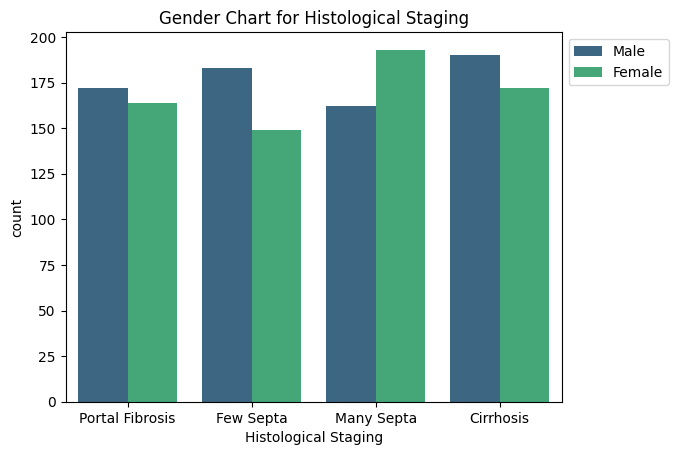

In [23]:
#Histological Stages across each Gender
sns.countplot(x=data_cat['Baselinehistological staging'],hue=data_cat['Gender'],palette="viridis")
plt.legend(bbox_to_anchor=(1,1))
plt.title("Gender Chart for Histological Staging")
plt.xlabel("Histological Staging")
plt.show()

In [24]:
data_cat['Histological Stages']=data_cat['Baselinehistological staging']
data_cat['Histological Gradings']=df['Baseline histological Grading']

# ***Visualization for the Symptoms Features and Histological (Grading&Staging)***

# Symptoms vs Histological stages across Gender

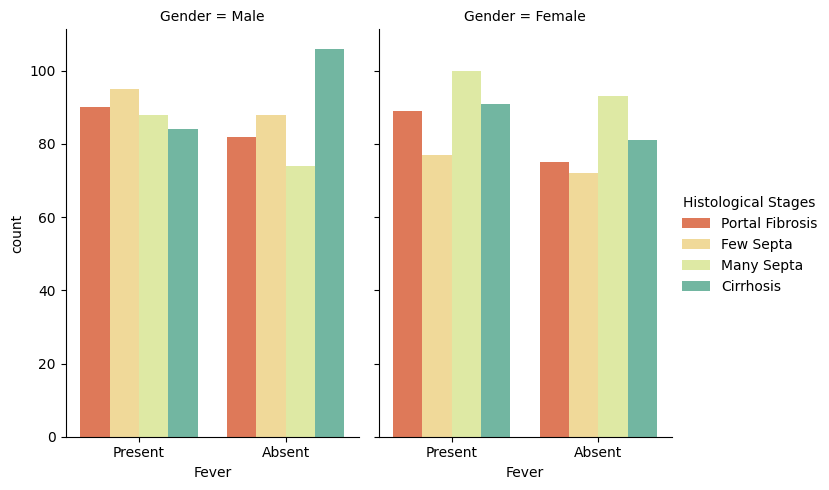

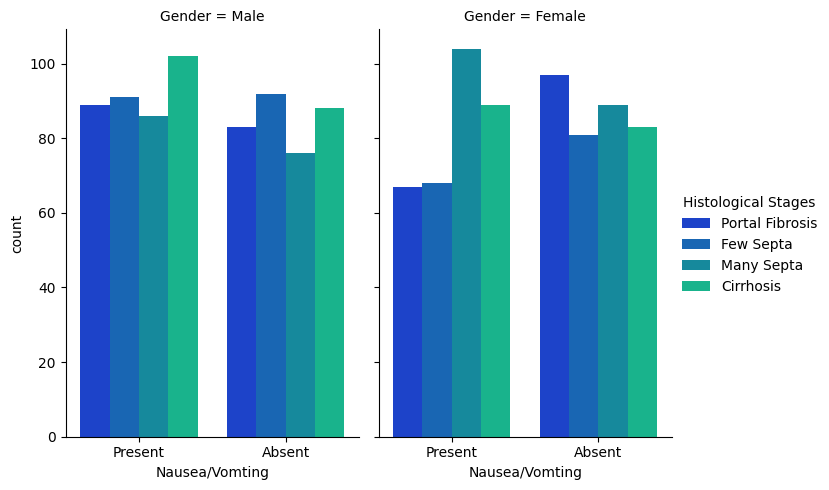

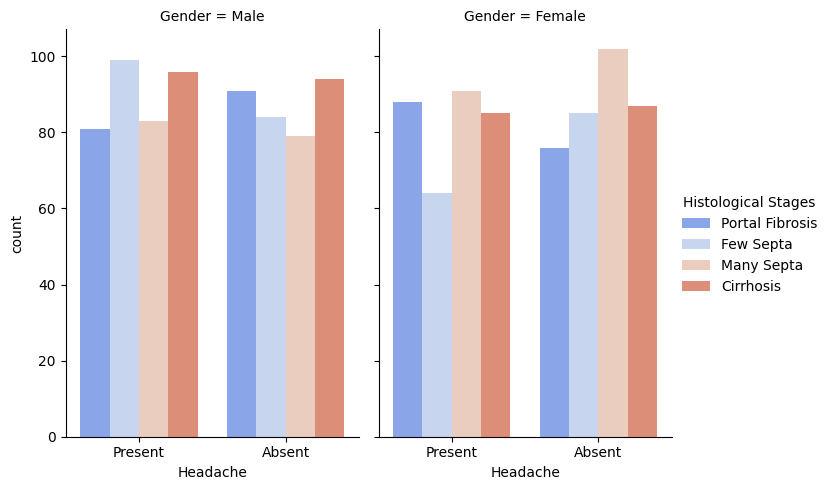

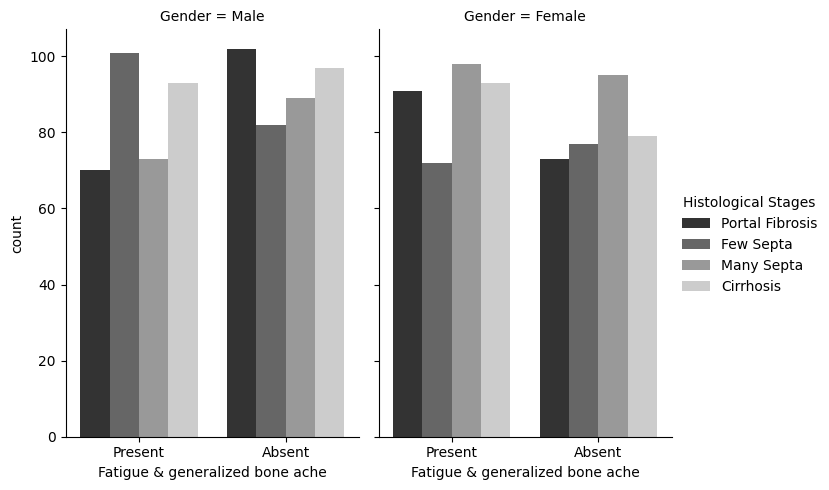

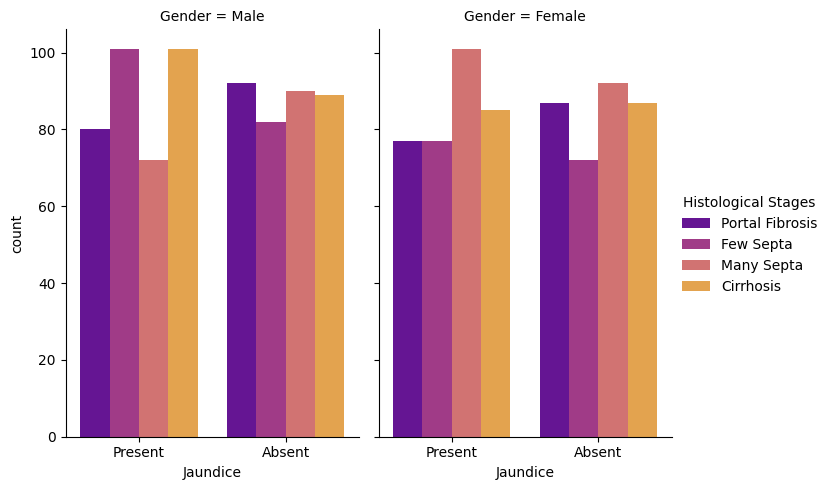

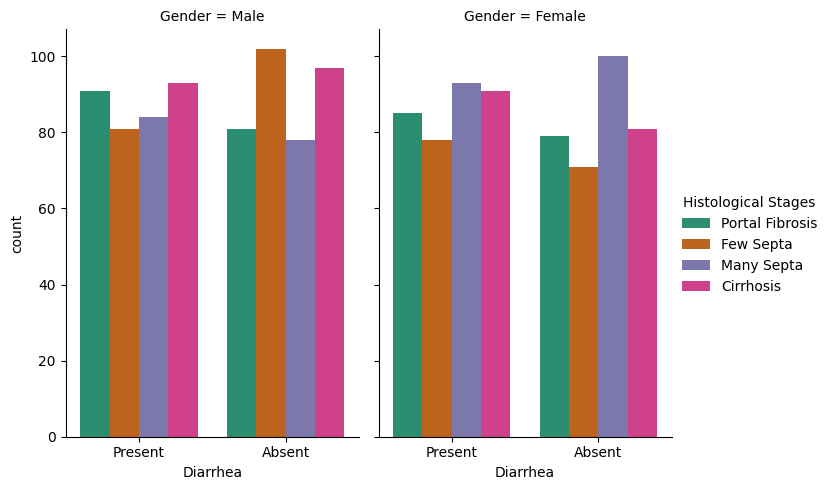

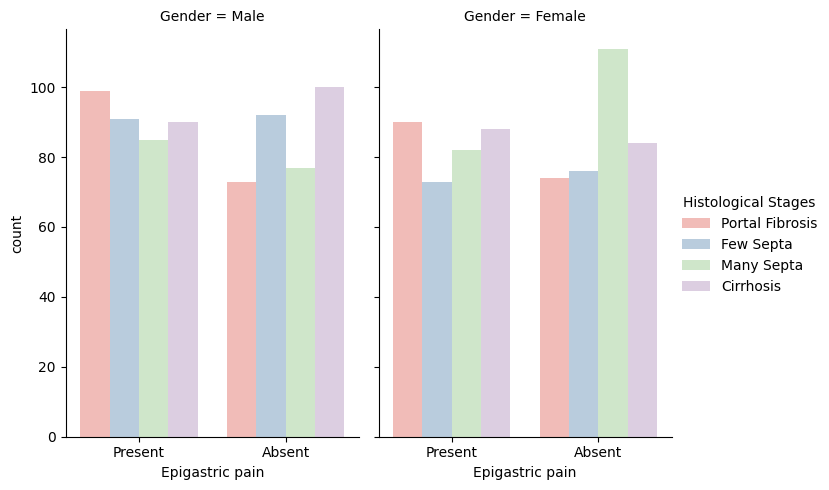

In [25]:
#parameters
order=['Present','Absent']
h_order=['Portal Fibrosis','Few Septa', 'Many Septa', 'Cirrhosis']
height=5
asp=0.7
palette=['winter','Spectral','coolwarm','gist_gray','plasma','Dark2','Pastel1']

#plots
FeverPltS = sns.catplot(x="Fever", hue="Histological Stages", col="Gender",
                data=data_cat, kind="count",
                 height=height, aspect=asp,order=order,hue_order=h_order,palette=palette[1])

NauseaPltS =sns.catplot(x="Nausea/Vomting", hue="Histological Stages", col="Gender",
                data=data_cat, kind="count",
                 height=height, aspect=asp,order=order,hue_order=h_order,palette=palette[0])


HeadachePltS =sns.catplot(x="Headache", hue="Histological Stages", col="Gender",
                data=data_cat, kind="count",
                 height=height, aspect=asp,order=order,hue_order=h_order,palette=palette[2])


FatiguePltS =sns.catplot(x="Fatigue & generalized bone ache", hue="Histological Stages", col="Gender",
                data=data_cat, kind="count",
                 height=height, aspect=asp,order=order,hue_order=h_order,palette=palette[3])


JaundicePltS =sns.catplot(x="Jaundice", hue="Histological Stages", col="Gender",
                data=data_cat, kind="count",
                 height=height, aspect=asp,order=order,hue_order=h_order,palette=palette[4])



DiarrheaPltS =sns.catplot(x="Diarrhea", hue="Histological Stages", col="Gender",
                data=data_cat, kind="count",
                 height=height, aspect=asp,order=order,hue_order=h_order,palette=palette[5])


Epigastric_painPltS =sns.catplot(x="Epigastric pain", hue="Histological Stages", col="Gender",
                data=data_cat, kind="count",
                 height=height, aspect=asp,order=order,hue_order=h_order,palette=palette[6])

# Symptoms vs Histological Gradings across Gender

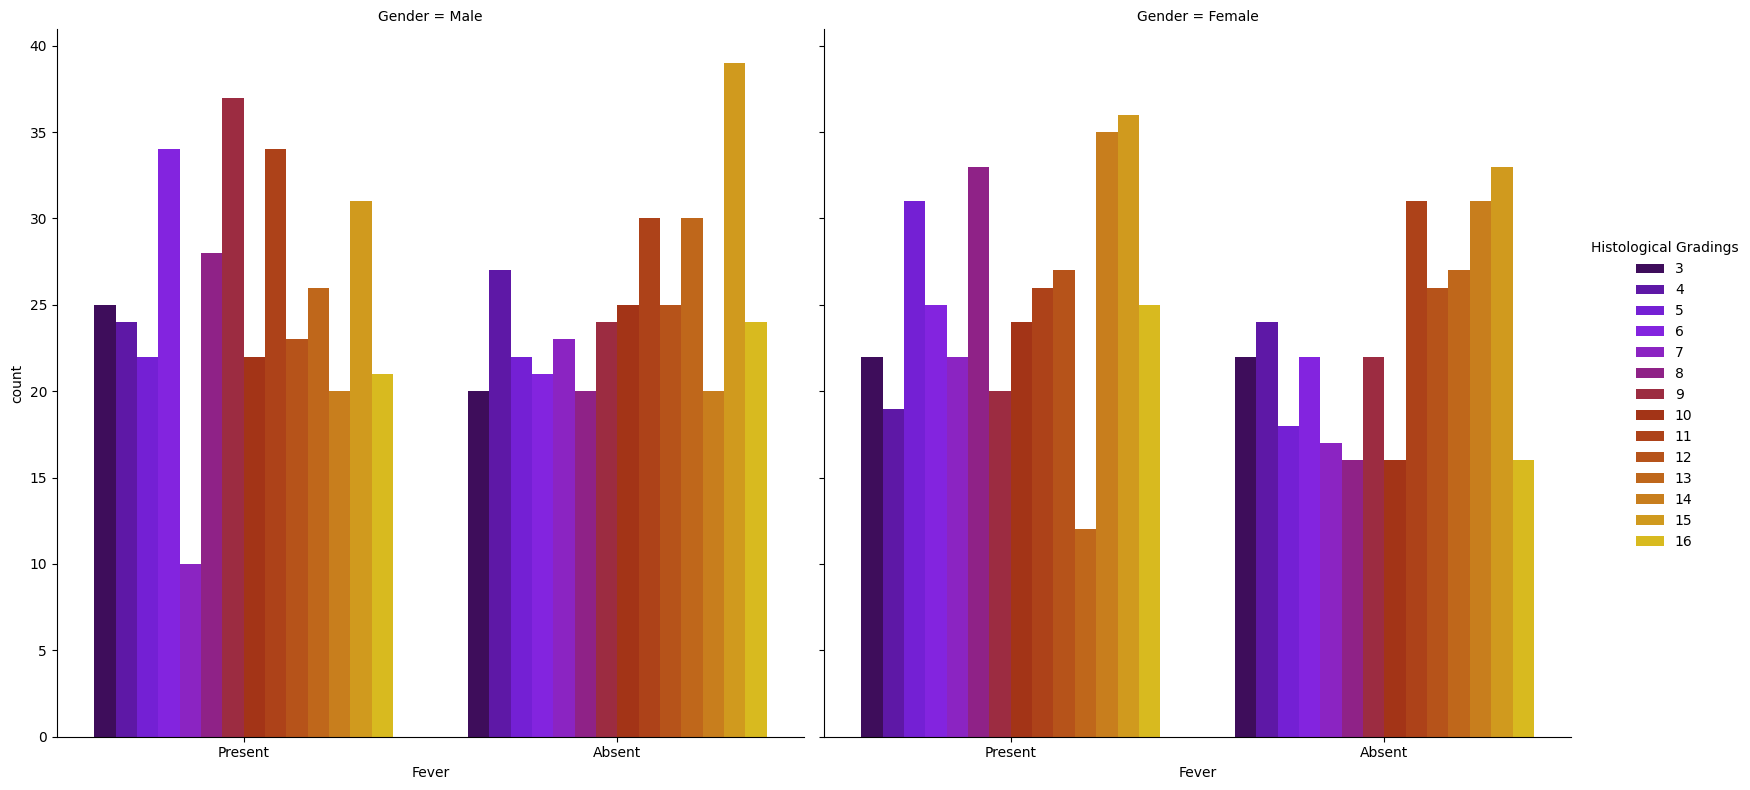

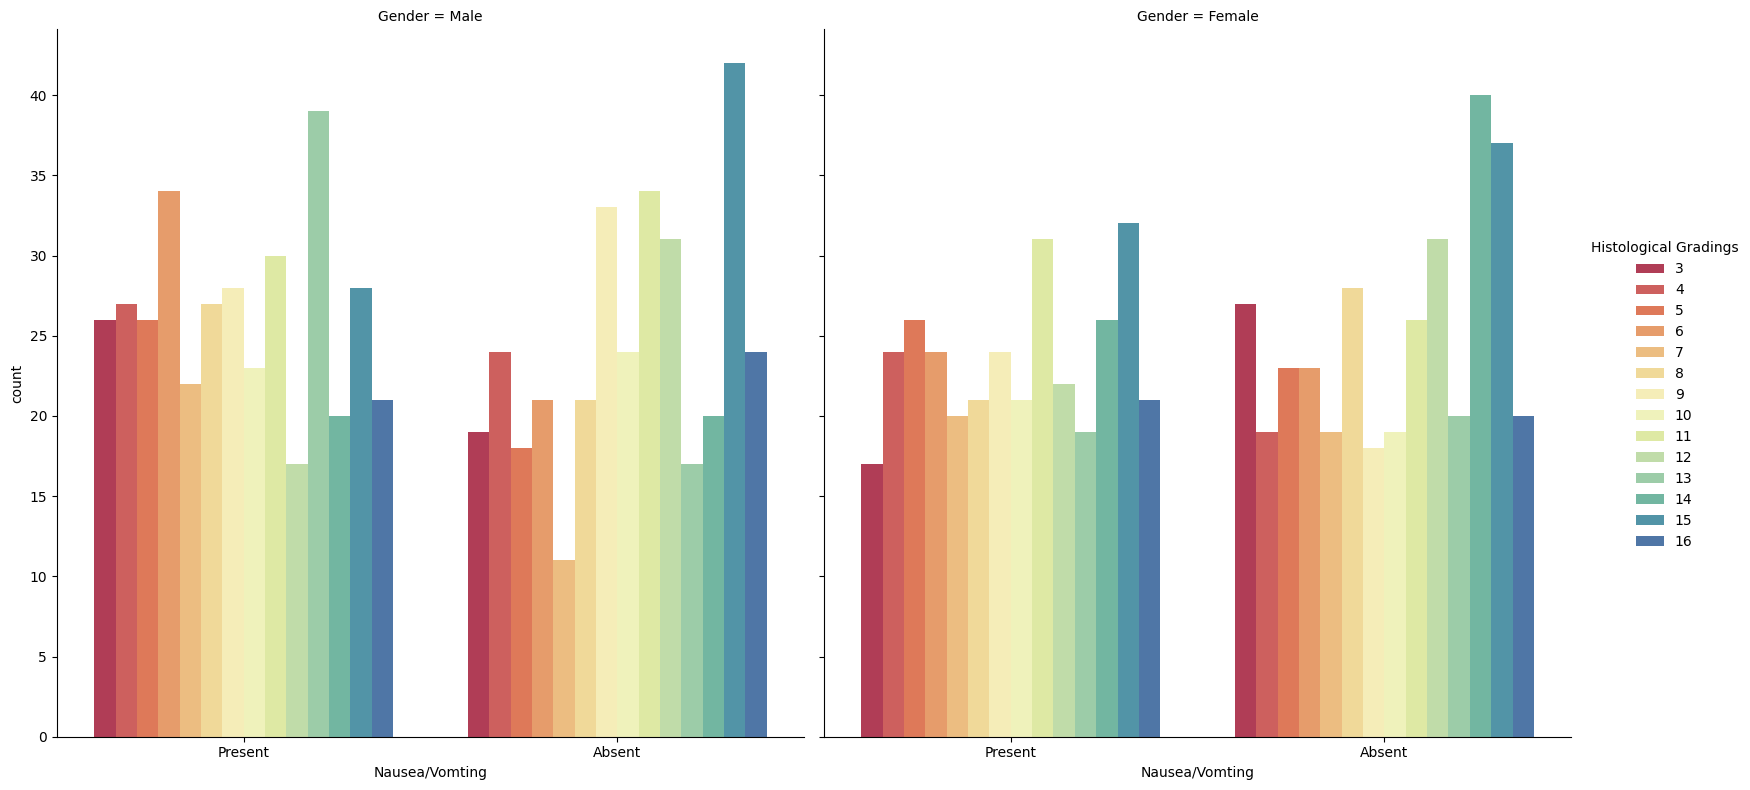

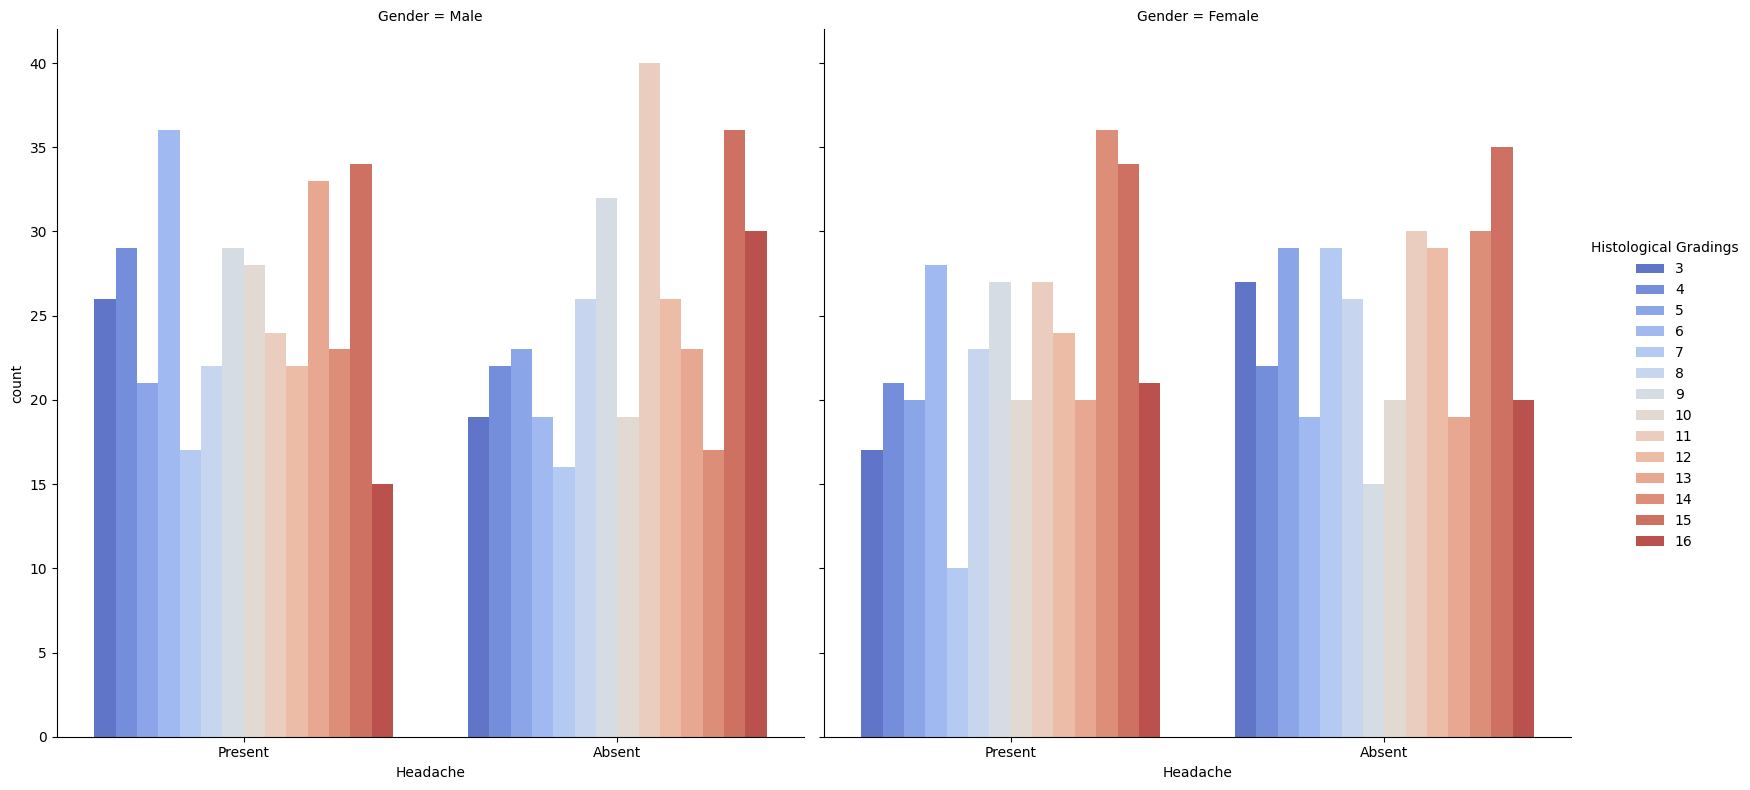

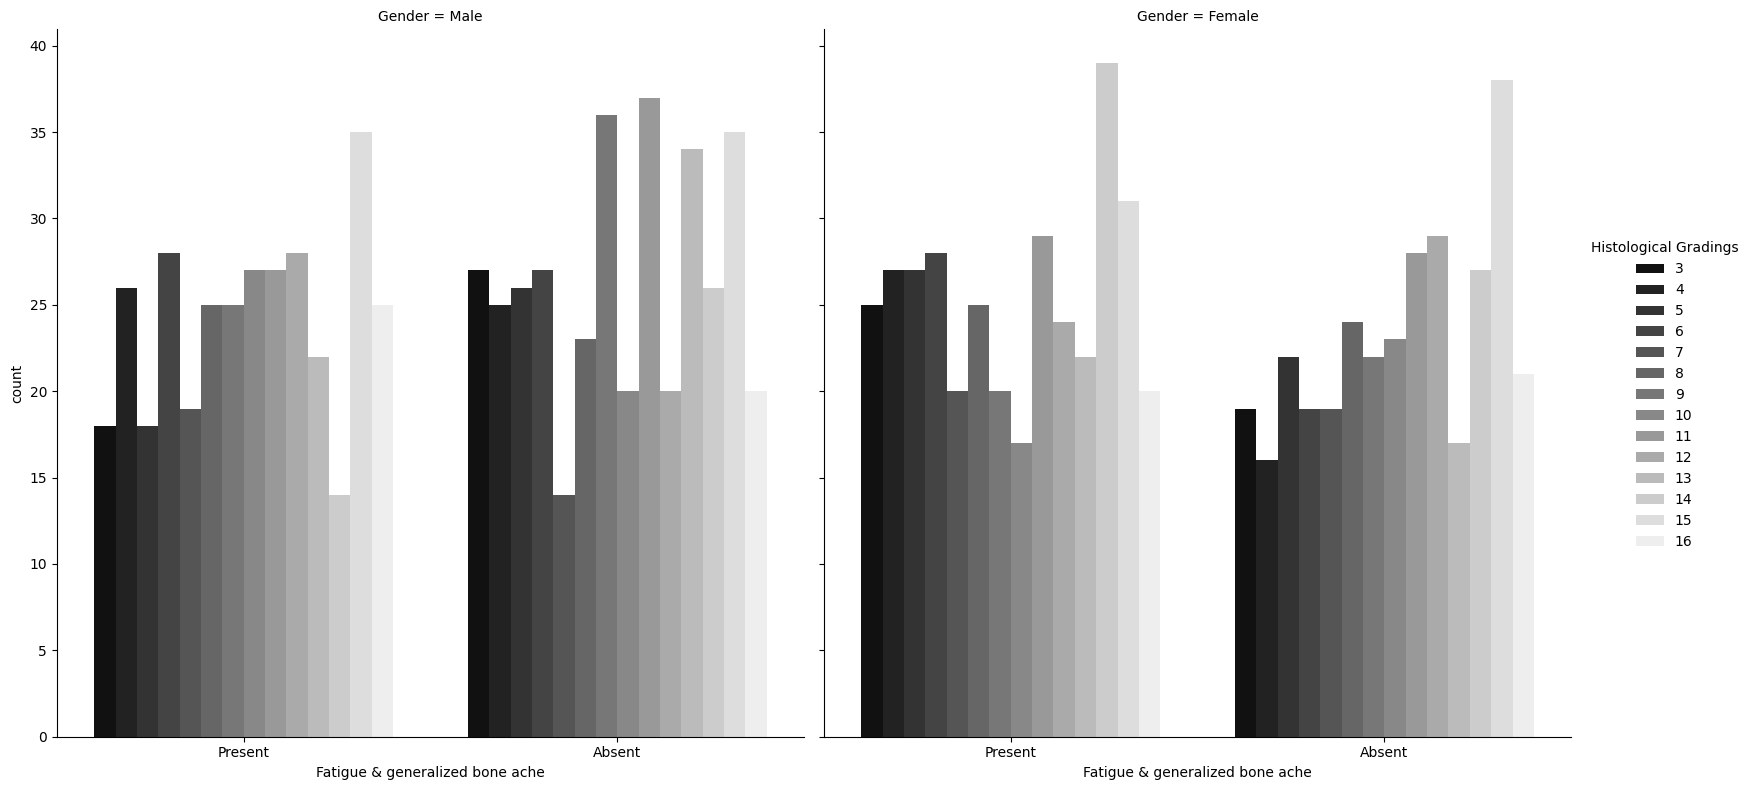

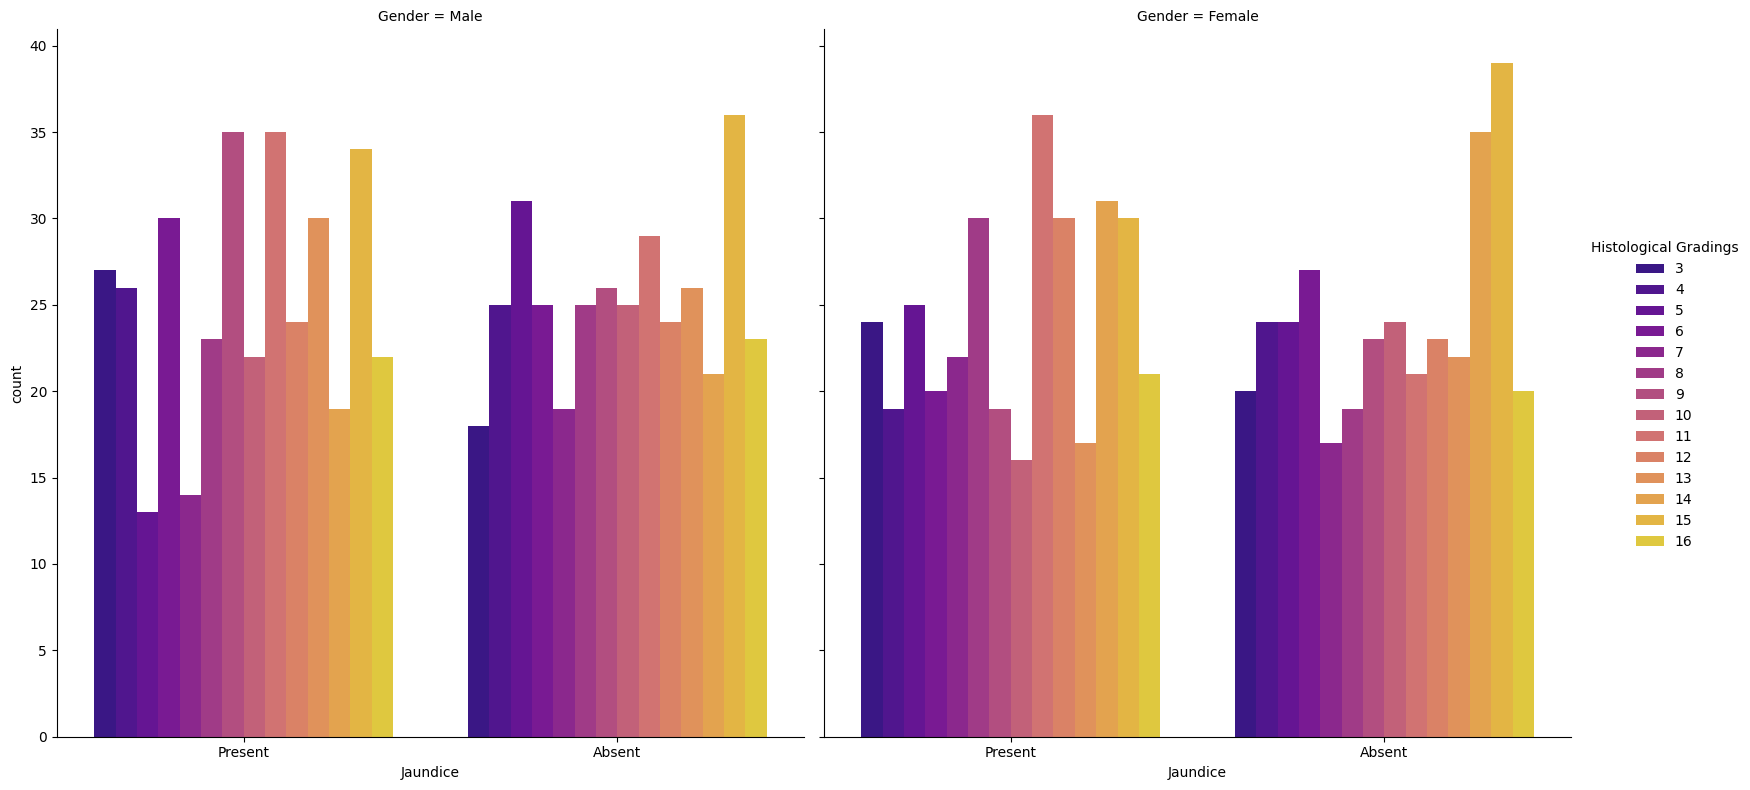

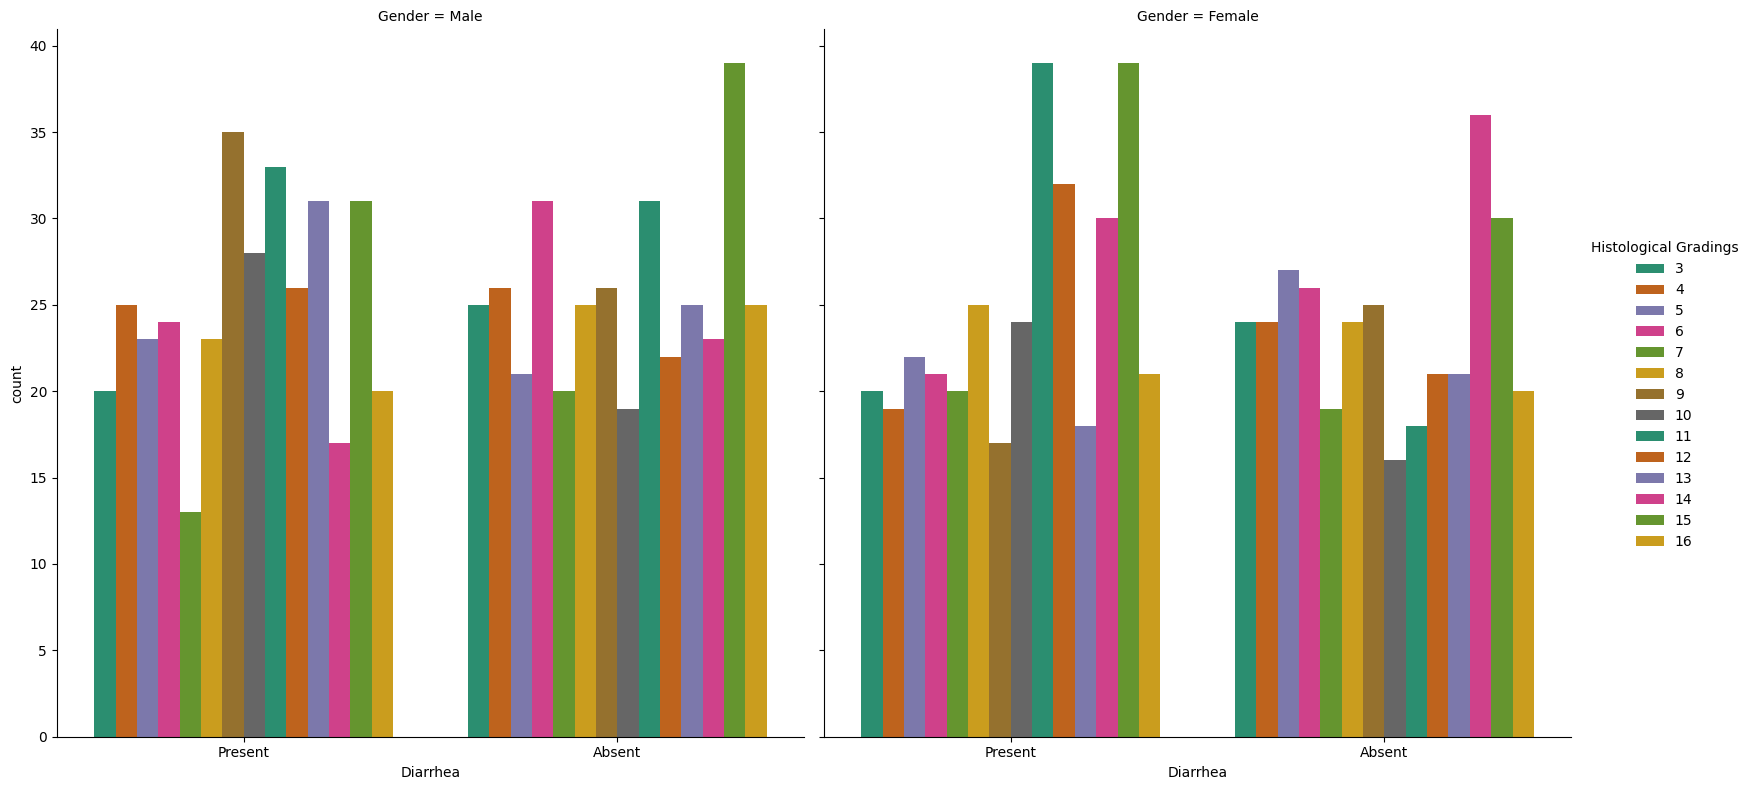

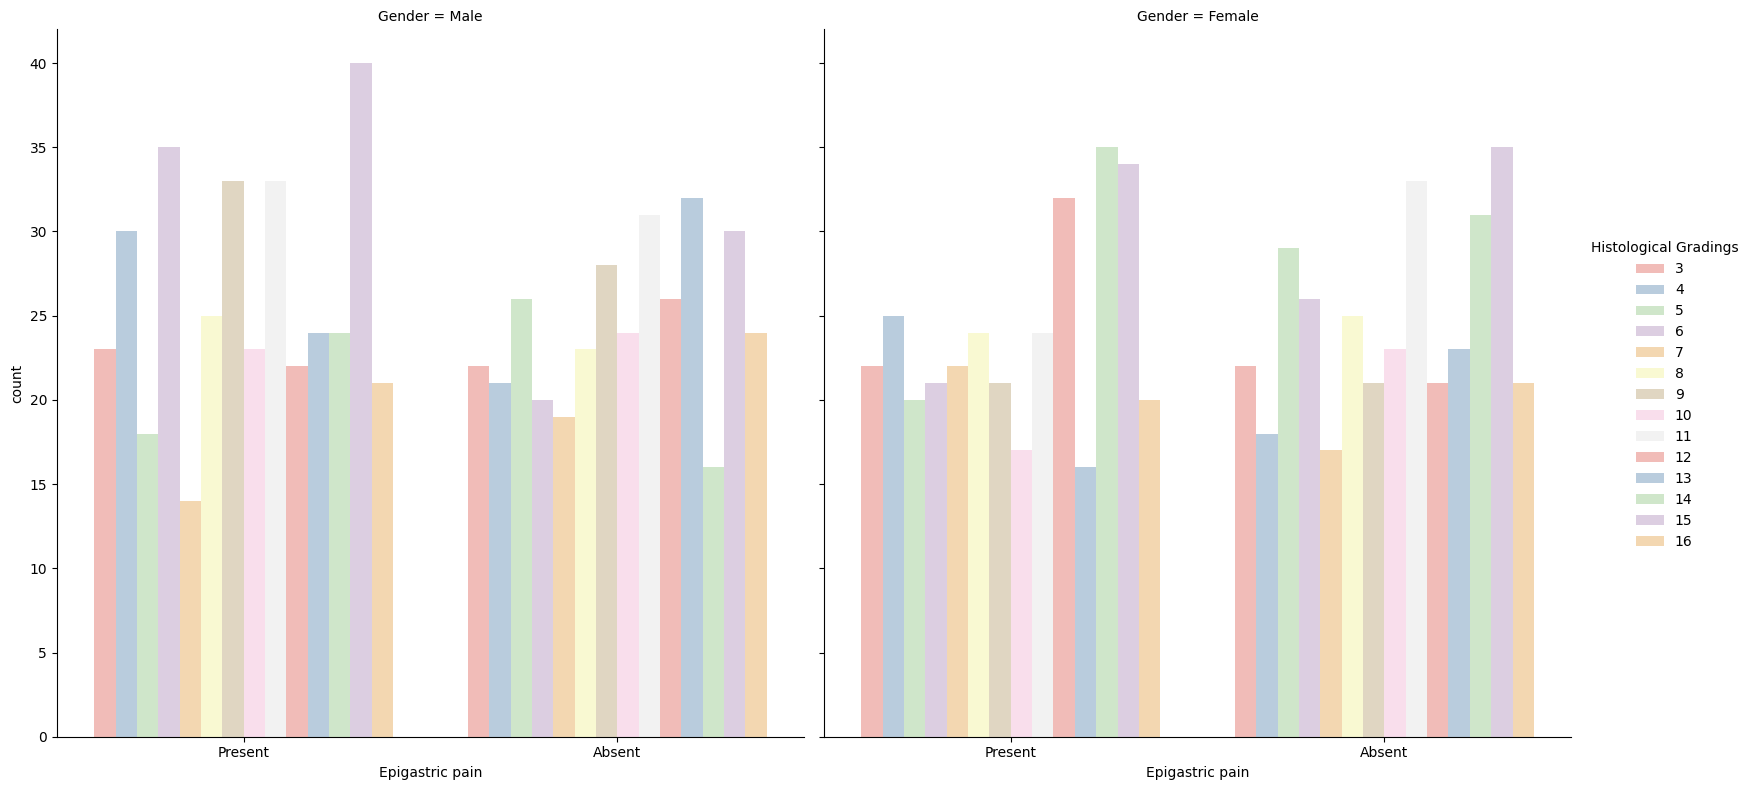

In [26]:

#parameters
order=['Present','Absent']
height=8
asp=1
palette=['winter','Spectral','coolwarm','gist_gray','plasma','Dark2','Pastel1']

#plots
FeverPltG = sns.catplot(x="Fever", hue="Histological Gradings", col="Gender",
                data=data_cat, kind="count",
                height=height, aspect=asp,order=order,palette="gnuplot")

NauseaPltG = sns.catplot(x="Nausea/Vomting", hue="Histological Gradings", col="Gender",
                data=data_cat, kind="count",
                height=height, aspect=asp,order=order,palette=palette[1])

HeadachePltG = sns.catplot(x="Headache", hue="Histological Gradings", col="Gender",
                data=data_cat, kind="count",
                height=height, aspect=asp,order=order,palette=palette[2])

FatiguePltG = sns.catplot(x="Fatigue & generalized bone ache", hue="Histological Gradings", col="Gender",
                data=data_cat, kind="count",
                height=height, aspect=asp,order=order,palette=palette[3])

JaundicePltG = sns.catplot(x="Jaundice", hue="Histological Gradings", col="Gender",
                data=data_cat, kind="count",
                height=height, aspect=asp,order=order,palette=palette[4],)

DiarrheaPltG = sns.catplot(x="Diarrhea", hue="Histological Gradings", col="Gender",
                data=data_cat, kind="count",
                height=height, aspect=asp,order=order,palette=palette[5],)

Epigastric_painPltG = sns.catplot(x="Epigastric pain", hue="Histological Gradings", col="Gender",
                data=data_cat, kind="count",
                height=height, aspect=asp,order=order,palette=palette[6],)

# Distribution of Age

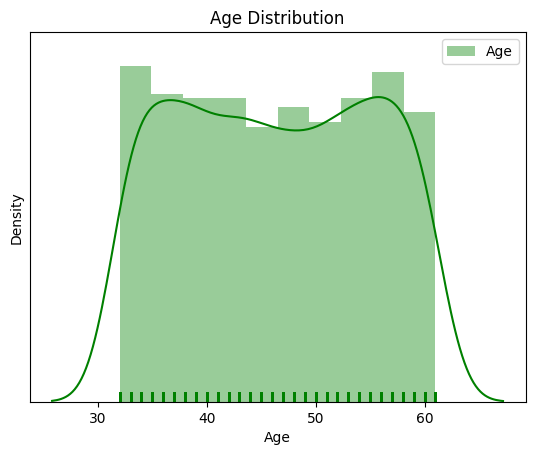

In [27]:
#Age distrubtion across the dataset

sns.distplot(df.Age,bins=10,label="Age",color="green",rug=True)
plt.yticks([])
plt.title("Age Distribution")
plt.legend()
plt.show()

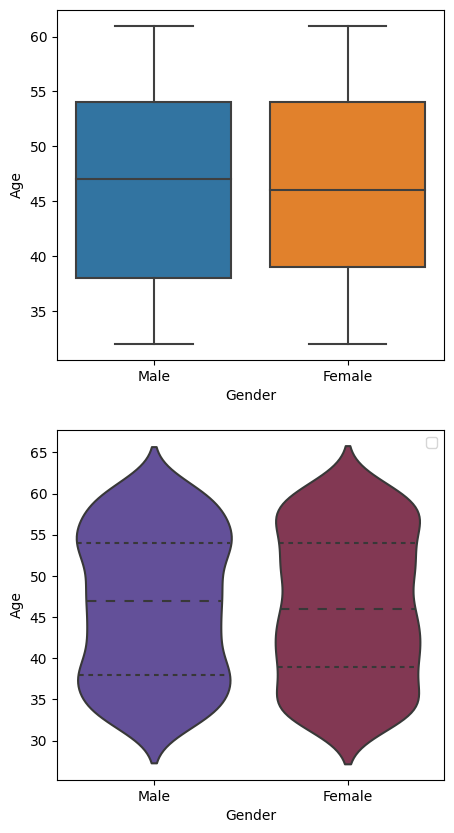

In [28]:
#Age with Gender
fig,axis=plt.subplots(2,1,figsize=(5,10))

sns.boxplot(x=data_cat["Gender"],y=df['Age'],ax=axis[0])
sns.violinplot(x=data_cat["Gender"],y=df['Age'],inner="quartile",bandwidth=0.2, ax=axis[1],palette='twilight')

plt.legend(bbox_to_anchor=(1,1))
plt.show()

The age of the patients varies between 35-60 with max. denisty in the 40-60 range with a slight diffrence in the median value (around 45) patients for both genders seems to have the same age distribution

# Aspartate Transminase Relation with :

WBC (White blood cell)

RBC (red blood cells)

HGB (Hemoglobin)

Plat (Platelets)

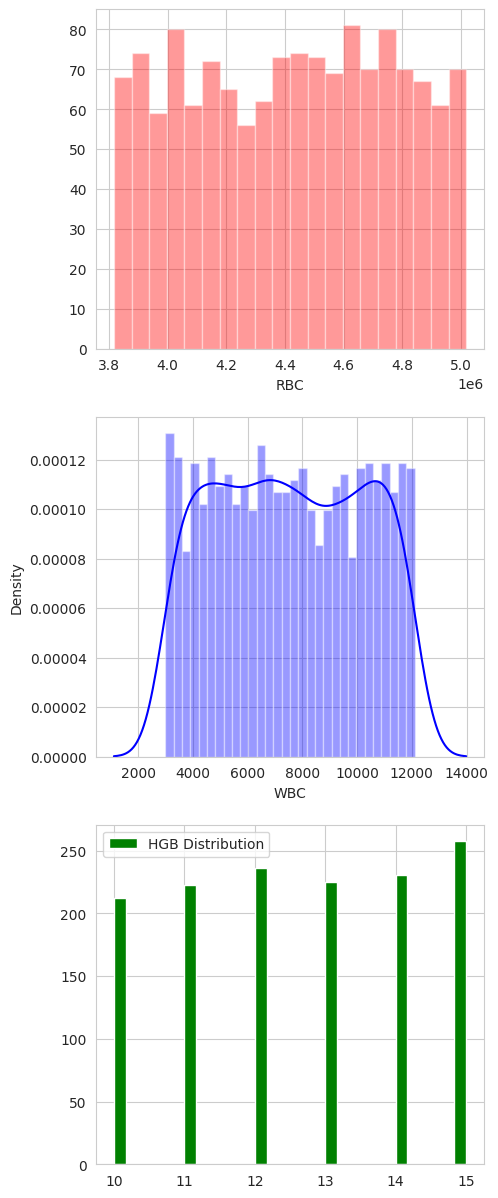

In [29]:
#check the disribution of RBC,WBC and HGB
sns.set_style('whitegrid')

fig,axis=plt.subplots(3,1,figsize=(5,15))

RBCplt=sns.distplot(df['RBC'], kde = False, color ='red', bins = 20,ax=axis[0],label="RBC Distribution")
WBCplt=sns.distplot(df['WBC'], kde = True, color ='blue', bins = 30,ax=axis[1],label="WBC Distribution")
HGBplt=plt.hist(df['HGB'] ,bins=30,label="HGB Distribution",color="green")


plt.legend()
plt.show()

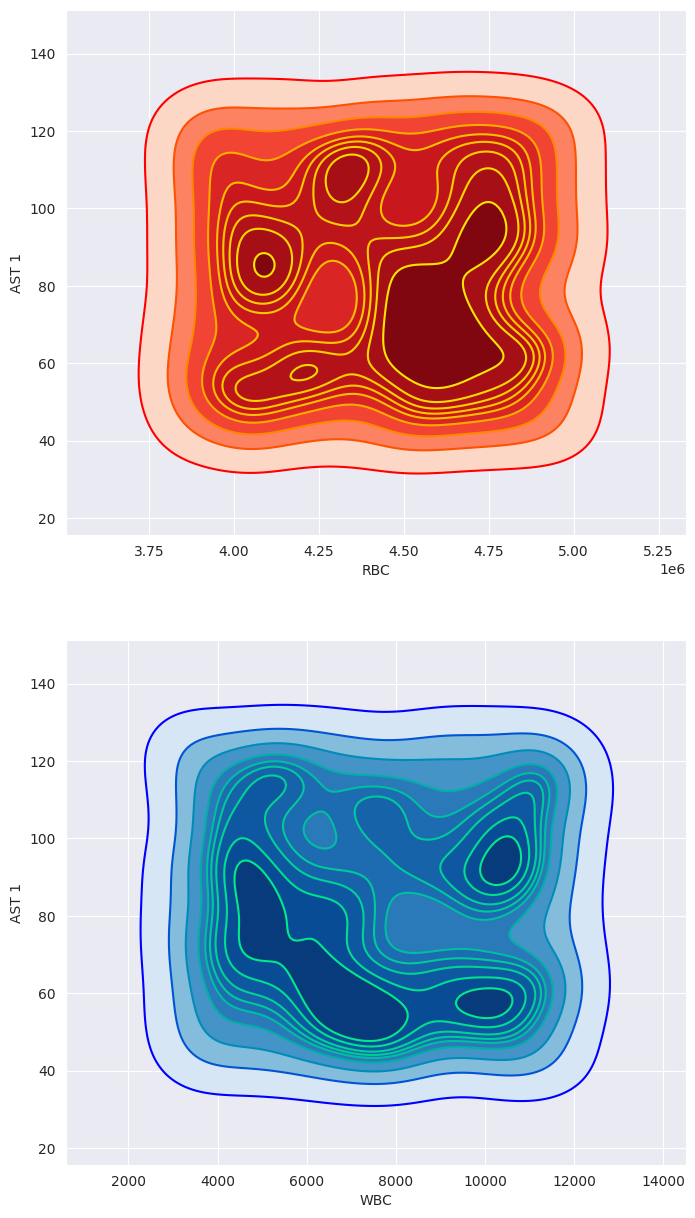

In [30]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(8, 15))

RBCASTplt = sns.kdeplot(data=df, x='RBC', y='AST 1', cmap="Reds", shade=True, shade_lowest=False, ax=axes[0])
RBCASTpltcontour = sns.kdeplot(data=df, x='RBC', y='AST 1', cmap="autumn", ax=axes[0])

WBCASTplt = sns.kdeplot(data=df, x='WBC', y='AST 1', cmap="Blues", shade=True, shade_lowest=False, ax=axes[1])
WBCASTpltcontour = sns.kdeplot(data=df, x='WBC', y='AST 1', cmap="winter", ax=axes[1])

plt.show()

Text(0.5, 1.0, 'Multi-Collinearity of Features')

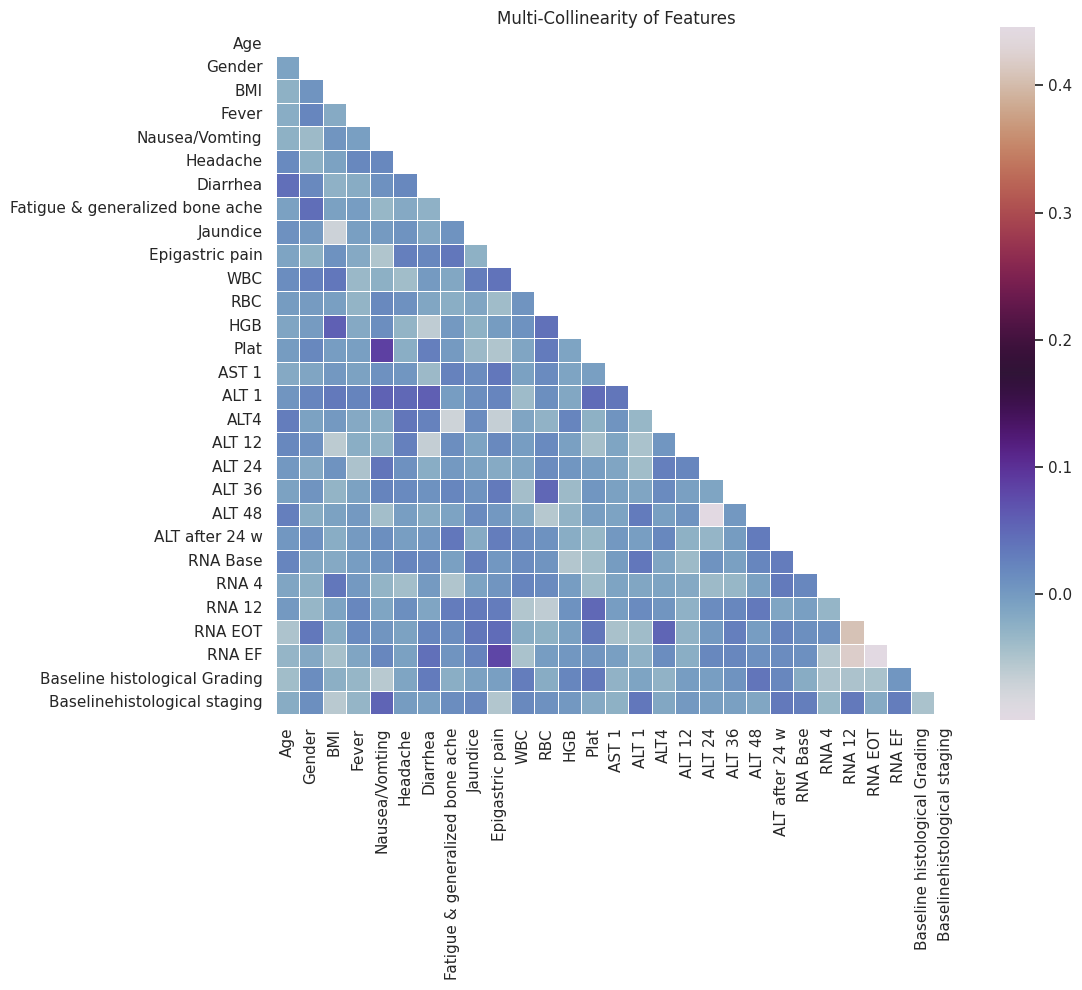

In [31]:
#Correlation heatmap matrix for numerical data

# Heatmap
sns.set(style="white")
# Create a correlation matrix
corr = df.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap="twilight",square=True,
            linewidth=.5)
ax.set_title('Multi-Collinearity of Features')

In [32]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **What is Principal Component Analysis ?**

PCA stands for Principal Component Analysis. It is a dimensionality reduction technique used in machine learning and data analysis. PCA aims to transform a high-dimensional dataset into a lower-dimensional space while preserving the most important information and patterns in the data.

# **What is StandardScaler ?**

StandardScaler is a data preprocessing technique used to standardize or normalize the features of a dataset. It is commonly applied in machine learning pipelines to ensure that all features have similar scales, which can be beneficial for certain algorithms and optimization processes.

In [33]:
# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
pca.fit(data_std)

# Get the explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_


print(explained_variance_ratio)

[0.06537824 0.04305738 0.04258932 0.04109136 0.04009137 0.03953493
 0.03893608 0.03817107 0.03662991 0.03653036 0.03568566 0.0354643
 0.03532464 0.03482243 0.03397621 0.03359524 0.0331568  0.03306659
 0.03198595 0.03131802 0.03050447 0.02985023 0.02971845 0.02919808
 0.0287288  0.02743341 0.02643062 0.01947211 0.01825798]


In [34]:
sorted(explained_variance_ratio, reverse=True)

[0.06537824265465458,
 0.043057377893950886,
 0.04258932210451807,
 0.04109135830546398,
 0.04009137072067824,
 0.03953493374967071,
 0.03893608242910288,
 0.038171066391504874,
 0.03662990567784288,
 0.03653035759128291,
 0.035685657612750867,
 0.03546429738486556,
 0.03532463903735372,
 0.03482243402044294,
 0.03397620640681409,
 0.033595238667256916,
 0.03315679600172219,
 0.033066585530002274,
 0.031985949337599226,
 0.03131802374794159,
 0.03050447402925596,
 0.029850232128243805,
 0.029718449125513226,
 0.029198078860854546,
 0.02872880098924219,
 0.02743340673869847,
 0.026430622293939148,
 0.019472112849994,
 0.018257977718839268]

In [35]:
cum = np.cumsum(sorted(explained_variance_ratio, reverse=True))

In [36]:
cum[cum<0.9]

array([0.06537824, 0.10843562, 0.15102494, 0.1921163 , 0.23220767,
       0.27174261, 0.31067869, 0.34884975, 0.38547966, 0.42201002,
       0.45769568, 0.49315997, 0.52848461, 0.56330705, 0.59728325,
       0.63087849, 0.66403529, 0.69710187, 0.72908782, 0.76040585,
       0.79091032, 0.82076055, 0.850479  , 0.87967708])

In [37]:
cum[cum<0.9].shape

(24,)

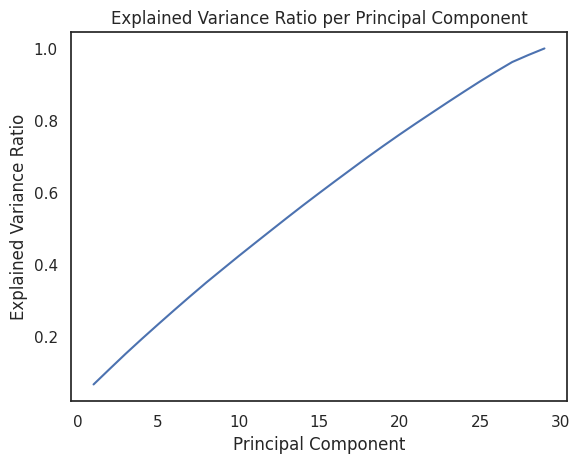

In [38]:
#Plot the explained variance ratios
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), cum)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.show()

# **Train The Model**

In [39]:
X = df.iloc[:,:-1]
Y = df.iloc[:,1]

## what is random forest classifier ?

A random forest classifier is a popular machine learning algorithm used for both classification and regression tasks. It is an ensemble learning method that combines multiple decision trees to make predictions.

# What is Pipeline ?

In the context of machine learning, a pipeline refers to a sequence of data processing steps that are chained together to form a cohesive workflow. It is a way to organize and automate the various stages involved in a machine learning project, including data preprocessing, feature engineering, model training, and prediction.

In [40]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the pipeline with PCA and classifier
pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier())
])

# Define the hyperparameter grid for tuning
param_grid = {
    'pca__n_components': [2, 3,4,5,6,7,8,9,10,15,20],  # Number of components to retain
    'classifier__n_estimators': [100, 200,250,500,750],  # Number of trees in the Random Forest
    'classifier__max_depth': [None, 5,10,20],  # Maximum depth of the trees
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_
val_accuracy = best_model.score(X_val, y_val)
print("Validation Accuracy: ", val_accuracy)


Best Hyperparameters:  {'classifier__max_depth': None, 'classifier__n_estimators': 250, 'pca__n_components': 20}
Best Accuracy:  0.9314173902409196
Validation Accuracy:  0.927797833935018


In [41]:
import pickle

In [44]:
with open('HCV.pkl','wb') as f :
  pickle.dump(grid_search,f)